<a href="https://colab.research.google.com/github/perigor/biblioteca_pandas/blob/main/An%C3%A1lise_Explorat%C3%B3ria_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Realizando análise exploratória e tratamento de dados de uma instituição financeira. Atráves desse excecício, foi realizado tratamento de dados categóricos, padronização de dados, remoção de duplicados, tratamento de nulos, com objetivo de deixar os dados em conformidade para uma proxima etapa.

#Utilizado:

#* Biblioteca Pandas;
#* Biblioteca Seaborn;
#* Biblioteca Statistics;
#* Columns, groupby, plot.bar, box.plot, describe, info, histplot, sts.median, fillna, is null,.loc, drop_duplicate, desvio padrao.


In [56]:
import pandas as pd # Tratando dados como data frame
import seaborn as srn # Gerar gráficos
import statistics as sts # Meios estatísticos para alterar dados nulos, outliers e etc...

In [57]:
# Importar dados

datasetchurn = pd.read_csv("/content/Churn.csv", sep=";")

In [59]:
# Vizualizar dados

datasetchurn.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [60]:
datasetchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      999 non-null    int64  
 1   X1      999 non-null    int64  
 2   X2      999 non-null    object 
 3   X3      991 non-null    object 
 4   X4      999 non-null    int64  
 5   X4.1    999 non-null    int64  
 6   X6      999 non-null    int64  
 7   X7      999 non-null    int64  
 8   X8      999 non-null    int64  
 9   X9      999 non-null    int64  
 10  X10     992 non-null    float64
 11  X11     999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [61]:
# Verificar tamanho do dataset em colunas e linhas

datasetchurn.shape

(999, 12)

In [62]:
# Foi constatado que colunas estão sem nome padrão adequado para bom entendimento
# Renomear colunas

datasetchurn.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartaoCredito", "Ativo", "Salario", "Saiu"]

In [63]:
datasetchurn.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Análise Exploratória:

## Verificar se os estados do dataset são somente da região sul;
## Verificar se na coluna Gereno há somente dados Masculino e Feminino;
## Verificar se há outlier ou dados negativos na coluna Idade;
# Verficar se há dados nulos ou faltantes.

In [ ]:
# Explorar dados categóricos

In [64]:
# Estado

agg = datasetchurn.groupby(["Estado"]).size()
agg

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

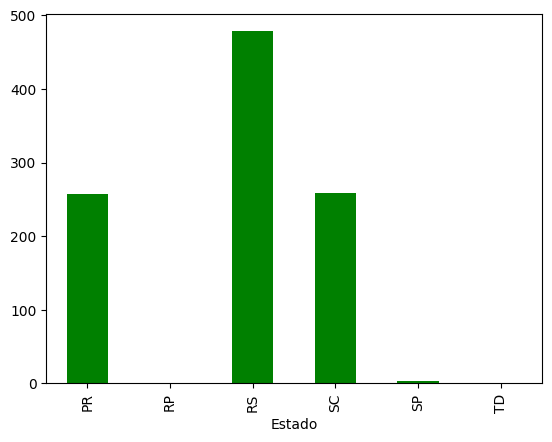

In [65]:
agg.plot.bar(color='green')

In [66]:
# Genero

agg = datasetchurn.groupby(['Genero']).size()
agg

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

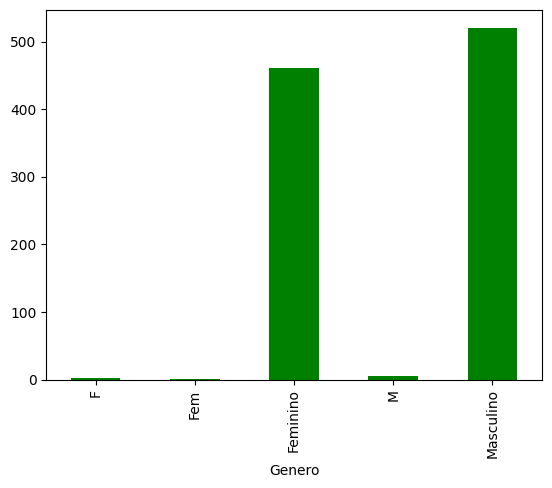

In [67]:
agg.plot.bar(color='green')

In [16]:
# Explorar colunas numéricas

In [68]:
# Score

datasetchurn["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

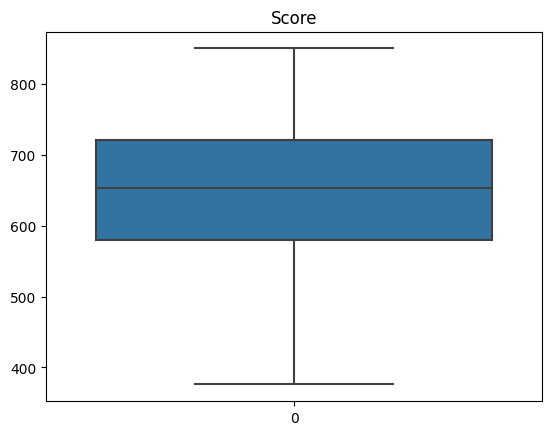

In [69]:
srn.boxplot(datasetchurn['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

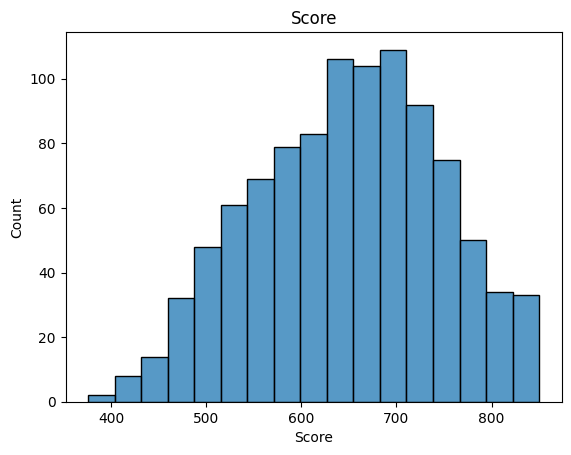

In [70]:
# Histograma

srn.histplot(datasetchurn['Score']).set_title('Score')

In [71]:
# Idade
# média e media com valores proximos significam dados dentro do padrão, apesar de min= -20 e max = 140 como outliers.
datasetchurn['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

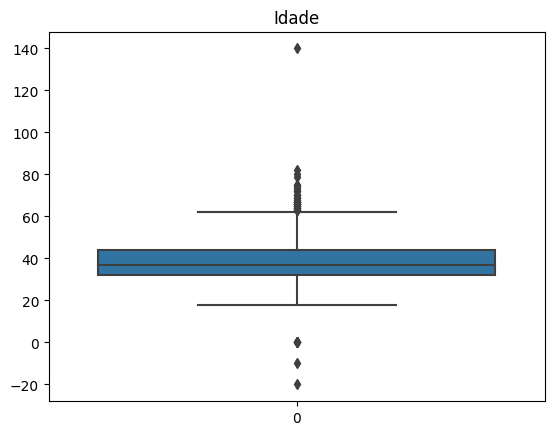

In [72]:
srn.boxplot(datasetchurn['Idade']).set_title('Idade')

# Aqui conseguimos ver que há caso específicos como outliers

Text(0.5, 1.0, 'Idade')

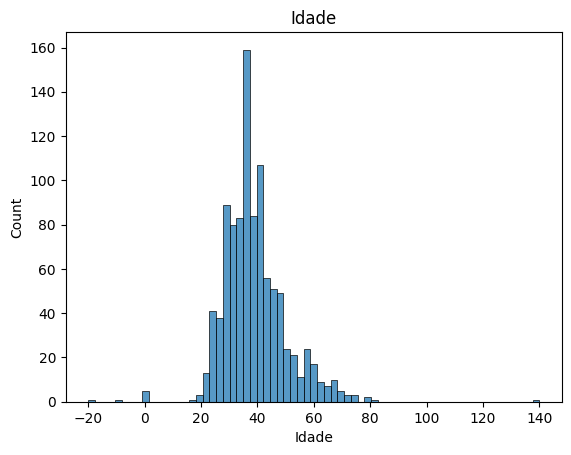

In [73]:
srn.histplot(datasetchurn['Idade']).set_title('Idade')

In [74]:
# Saldo

datasetchurn["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

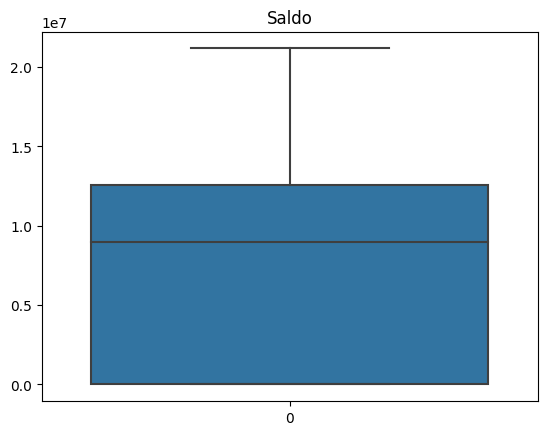

In [75]:
srn.boxplot(datasetchurn['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

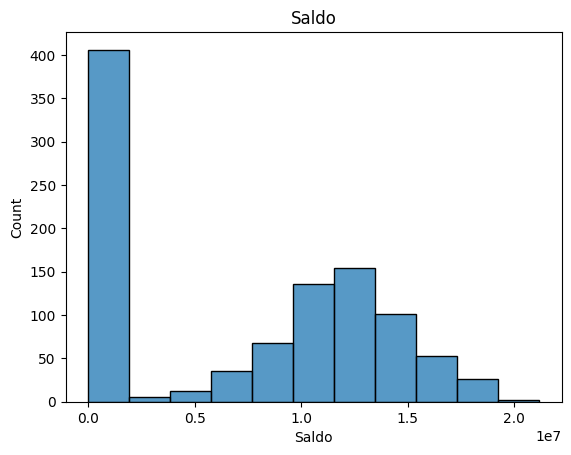

In [76]:
# Muitas pessoas com 0 saldo zero na conta
srn.histplot(datasetchurn['Saldo']).set_title('Saldo')

In [77]:
# Salário

datasetchurn['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

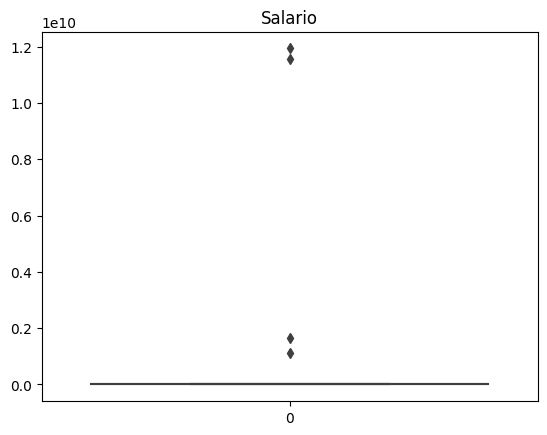

In [78]:
srn.boxplot(datasetchurn['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

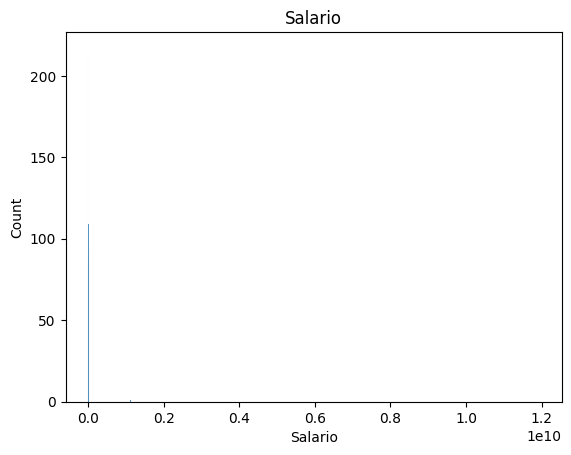

In [79]:
srn.histplot(datasetchurn['Salario']).set_title('Salario')

In [82]:
# Contagem de Valores NAN


datasetchurn.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              8
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             7
Saiu                0
dtype: int64

In [83]:
# Na coluna genero observamos que a valores NAN, então podemos substituí-los pela mediana.

mediana = sts.median(datasetchurn["Salario"])
mediana

70518.0

In [84]:
# Substituindo NAN por mediana
# função (fillna) serve para preencher valores não disponíveis

datasetchurn["Salario"].fillna(mediana, inplace=True)

In [85]:
# Verificar NAN na coluna sálario

datasetchurn["Salario"].isnull().sum()

0

In [ ]:
# Verificar dados categóricos da coluna genero

In [86]:
agg = datasetchurn.groupby(["Genero"]).size()
agg

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [87]:
datasetchurn["Genero"].isnull().sum()

8

In [88]:
# Foi indentificado uma falta de padrão;
# F, Fem e Feminino são dados iguais;
# M e Masculino são dados iguais;
# Verificado que há dados nulos.

In [89]:
# Preenchendo os nulos com "Masculino" porque o mesmo é a "moda" (dado que mais ocorre).
# função (fillna) serve para preencher valores não disponíveis.


datasetchurn["Genero"].fillna("Masculino", inplace=True)

In [90]:
datasetchurn["Genero"].isnull().sum()

0

In [91]:
# Padronização de dados da Coluna genero

datasetchurn.loc[datasetchurn["Genero"] == "M", "Genero"] = "Masculino"
datasetchurn.loc[datasetchurn["Genero"].isin( ["Fem", "F"]), "Genero"] = "Feminino"

# Vizualizar padronização

agg = datasetchurn.groupby(["Genero"]).size()
agg

Genero
Feminino     464
Masculino    535
dtype: int64

In [92]:
# Idade

datasetchurn['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [93]:
# Na vizualização de idade verificamos alguns outliers como -20 e 140
# Vou criar uma função para retornar os valores outliers.

datasetchurn.loc[(datasetchurn["Idade"] < 0 ) | (datasetchurn["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [99]:
# Calcular a mediana e substituir nos outliers

medianaIdade = sts.median(datasetchurn["Idade"])
medianaIdade

37

In [103]:
# Substituíndo

datasetchurn.loc[(datasetchurn["Idade"] < 0 ) | (datasetchurn["Idade"] > 120), "Idade"] = medianaIdade

In [104]:
# Vizualizando

datasetchurn.loc[(datasetchurn["Idade"] < 0 ) | (datasetchurn["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [106]:
# Verificar dados duplicados
# Verificação por ID

datasetchurn[datasetchurn.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [108]:
# Excluindo duplicados
# Função(drop.duplicates), subset(coluna), keep=first(manter o primeiro), inplace(fazer alateração no próprio conjunto de dados).

datasetchurn.drop_duplicates(subset="Id", keep="first", inplace=True)

# Consultar duplicados novamente

datasetchurn[datasetchurn.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [109]:
# Estado

agg = datasetchurn.groupby(["Estado"]).size()
agg

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [111]:
# Estados fora do domínio serão atribuídos à moda (RS).

datasetchurn.loc[datasetchurn["Estado"].isin( ["RP", "SP", "TD",]), "Estado"] = "RS"
agg = datasetchurn.groupby(["Estado"]).size()

In [112]:
# Verificando atribuição.
agg

Estado
PR    257
RS    483
SC    258
dtype: int64

In [113]:
# Tratamento de outliers em "Salario".

dvp = sts.stdev(datasetchurn["Salario"])
dvp

528988918.4679201

In [115]:
# Verificar se existe algum salário maior que duas vezes o desvio padrão.

datasetchurn.loc[datasetchurn["Salario"] >= 2 * dvp ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [117]:
# Indentificar a mediana para substituir nos valores que passaram 2 vezes o desvio padrão.

medianaSalario = sts.median(datasetchurn["Salario"])
medianaSalario

8637195.5

In [120]:
# Atribuição

datasetchurn.loc[datasetchurn["Salario"] >= 2 * dvp, "Salario"] = medianaSalario

# Checar Atribuição

datasetchurn.loc[datasetchurn["Salario"] >= 2 * dvp ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [121]:
datasetchurn.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [123]:
datasetchurn.shape

(998, 12)

In [125]:
datasetchurn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                998 non-null    int64  
 1   Score             998 non-null    int64  
 2   Estado            998 non-null    object 
 3   Genero            998 non-null    object 
 4   Idade             998 non-null    int64  
 5   Patrimonio        998 non-null    int64  
 6   Saldo             998 non-null    int64  
 7   Produtos          998 non-null    int64  
 8   TemCartaoCredito  998 non-null    int64  
 9   Ativo             998 non-null    int64  
 10  Salario           998 non-null    float64
 11  Saiu              998 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 101.4+ KB


In [127]:
datasetchurn.describe

<bound method NDFrame.describe of        Id  Score Estado     Genero  Idade  Patrimonio     Saldo  Produtos  \
0       1    619     RS   Feminino     42           2         0         1   
1       2    608     SC   Feminino     41           1   8380786         1   
2       3    502     RS   Feminino     42           8   1596608         3   
3       4    699     RS   Feminino     39           1         0         2   
4       5    850     SC   Feminino     43           2  12551082         1   
..    ...    ...    ...        ...    ...         ...       ...       ...   
994   996    838     SC  Masculino     43           9  12310588         2   
995   997    610     SC  Masculino     29           9         0         3   
996   998    811     SC  Masculino     44           3         0         2   
997   999    587     SC  Masculino     62           7  12128627         1   
998  1000    811     PR   Feminino     28           4  16773882         2   

     TemCartaoCredito  Ativo     Salario 